<a href="https://colab.research.google.com/github/yulishadian/Image-Classification_270-268/blob/main/Image%20Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Tugas Besar ML/Flowers"

In [10]:
%cd "/content/gdrive/My Drive/Tugas Besar ML"

/content/gdrive/My Drive/Tugas Besar ML


In [11]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


# Preprocessing

In [12]:
!unzip "/content/gdrive/My Drive/Tugas Besar ML/flowers-recognition.zip" -d "/content/gdrive/My Drive/Tugas Besar ML"

Archive:  /content/gdrive/My Drive/Tugas Besar ML/flowers-recognition.zip
replace /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/gdr

In [18]:
!ls

 flowers   Flowers   flowers-recognition.zip  'Model CNN_1.ipynb'


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models

In [15]:
mypath= 'flowers/'

In [16]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [17]:
import pandas as pd

# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
daisy         764
dandelion    1052
rose          784
sunflower     733
tulip         984
dtype: int64

In [19]:
#cek sample datanya
df.head()

,path,file_name,tag
0,flowers/daisy/10559679065_50d2b16f6d.jpg,10559679065_50d2b16f6d.jpg,daisy
1,flowers/daisy/13953307149_f8de6a768c_m.jpg,13953307149_f8de6a768c_m.jpg,daisy
2,flowers/daisy/1344985627_c3115e2d71_n.jpg,1344985627_c3115e2d71_n.jpg,daisy
3,flowers/daisy/1150395827_6f94a5c6e4_n.jpg,1150395827_6f94a5c6e4_n.jpg,daisy
4,flowers/daisy/1285423653_18926dc2c8_n.jpg,1285423653_18926dc2c8_n.jpg,daisy


In [20]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [22]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [24]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [25]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [26]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [27]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 3453
val size 432
test size 432


In [28]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag      
test        daisy         79
            dandelion    112
            rose          86
            sunflower     67
            tulip         88
train       daisy        608
            dandelion    834
            rose         614
            sunflower    602
            tulip        795
validation  daisy         77
            dandelion    106
            rose          84
            sunflower     64
            tulip        101
dtype: int64 




,path,tag,set
1215,flowers/sunflower/23247483352_0defc7a6dc_n.jpg,sunflower,train
2000,flowers/tulip/8585103457_d64697c3cf_n.jpg,tulip,train
4007,flowers/rose/5398569540_7d134c42cb_n.jpg,rose,validation


In [32]:
train_path = os.path.join("/content/gdrive/MyDrive/Tugas Besar ML/flowers")
classes = os.listdir(train_path)

In [35]:
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_data = train_gen.flow_from_directory(
    train_path, 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
    shuffle = True,
)

Found 4317 images belonging to 5 classes.


(64, 150, 150, 3)


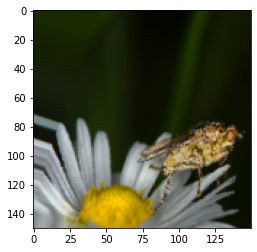

In [36]:
x, y = next(train_data)
print(x.shape)
plt.imshow(x[0])

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
history = model.fit(train_data, epochs = 10 )

Epoch 1/10
68/68 [==============================] - 42s 608ms/step - loss: 1.1344 - acc: 0.5332
Epoch 2/10
68/68 [==============================] - 41s 607ms/step - loss: 0.9857 - acc: 0.6118
Epoch 3/10
68/68 [==============================] - 41s 607ms/step - loss: 0.9160 - acc: 0.6416
Epoch 4/10
68/68 [==============================] - 41s 607ms/step - loss: 0.8375 - acc: 0.6725
Epoch 5/10
68/68 [==============================] - 41s 608ms/step - loss: 0.8199 - acc: 0.6822
Epoch 6/10
68/68 [==============================] - 41s 602ms/step - loss: 0.7836 - acc: 0.6989
Epoch 7/10
68/68 [==============================] - 41s 603ms/step - loss: 0.7480 - acc: 0.7183
Epoch 8/10
68/68 [==============================] - 41s 604ms/step - loss: 0.7093 - acc: 0.7250
Epoch 9/10
54/68 [======================>.......] - ETA: 8s - loss: 0.6971 - acc: 0.7279